# Week 10 Discussion: PCA and Clustering Using DBSCAN and KMeans

## Objectives

In this week's discussion, we will learn:
* PCA
* Clustering using DBSCAN and KMeans

## Preparing the Data

Before importing the data, as usual, we import _pandas_ library to simplify data manipulation.

In [1]:
import pandas as pd

In this discussion we use _EDViz_ dataset which is the data of ED triage admission using patient history. For more information on the dataset, please look up the paper:

Hong, Woo Suk, Adrian Daniel Haimovich, and R. Andrew Taylor. "Predicting hospital admission at emergency department triage using machine learning." PloS one 13, no. 7 (2018): e0201016.

In [2]:
df = pd.read_csv('edviz_raw.csv')

We now print out the dataset to gain more insight in it:

In [3]:
print (df.head(5))

  dep_name  esi   age  gender           ethnicity  \
0        B  4.0  40.0    Male  Hispanic or Latino   
1        B  4.0  66.0    Male  Hispanic or Latino   
2        B  2.0  66.0    Male  Hispanic or Latino   
3        A  2.0  66.0    Male  Hispanic or Latino   
4        A  3.0  84.0  Female  Hispanic or Latino   

                                        race     lang     religion  \
0                         White or Caucasian  English         None   
1  Native Hawaiian or Other Pacific Islander  English  Pentecostal   
2  Native Hawaiian or Other Pacific Islander  English  Pentecostal   
3  Native Hawaiian or Other Pacific Islander  English  Pentecostal   
4                                      Other    Other  Pentecostal   

  maritalstatus  employstatus      ...      cc_vaginaldischarge  \
0        Single     Full Time      ...                      0.0   
1       Married  Not Employed      ...                      0.0   
2       Married  Not Employed      ...                     

In [7]:
y = df[['disposition', 'esi']]
X = df.drop(columns=['disposition', 'esi'])

Printing out the output, we have:

In [27]:
y

,disposition,esi
0,Discharge,4.0
1,Discharge,4.0
2,Discharge,2.0
3,Discharge,2.0
4,Admit,3.0
5,Discharge,3.0
6,Admit,3.0
7,Discharge,4.0
8,Admit,2.0
9,Admit,2.0


Converting categorical to numerical, we have:

In [8]:
X_cat = X.select_dtypes(exclude=['int64', 'float64'])                                                                                                         
X_dog = X.select_dtypes(include=['int64', 'float64'])                                                                                                         
                                                                                                                                                              
X_cat = pd.get_dummies(X_cat)                                                                                                                                 
X = pd.concat([X_cat, X_dog], axis=1)

Now we normalize all the input features:

In [9]:
X = (X - X.min())/(X.max()-X.min())

X = X - X.mean()

X = X.fillna(X.mean())

There will still be columns that are nan. Will drop them all.

In [10]:
X.dropna(axis=1, how='all', inplace=True)

## Checking the Dimensionality

Let's print the shape of the dataset now:

In [11]:
X.shape

(560486, 1049)

We're cursed! We have learned about the curse of dimensionality before and we have to address it. Before 

## Subsampling rows:

Since the dataset has too many rows, we can subsample it for our experiments:

In [12]:
X_sub = X.sample(1000, random_state = 0)
y_sub = y.sample(1000, random_state = 0)

## PCA Dimensionality Reduction:

To reduce the dimensionality of the data, we perform PCA. We define a PCA by the number of components, fit it to the data, and then transform the data using it.

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
pca.fit(X_sub)
X_trans = pca.transform(X_sub)

## Clustering Using DBSCAN and KMeans

Here we try two different clustering algorithms. DBSCAN is a density based algorithm which groups the points which are closely packed together. It does not take the number of clusters as an argument because the number depends on the data itself. KMeans, on the other hand, accepts the number of clusters from the beginning.

### DBSCAN:

The points in this algorithm are classified as follows:

* A point p is a core point if at least minPts points are within distance ε of it (including p).
* A point q is directly reachable from p if point q is within distance ε from core point p. Points are only said to be directly reachable from core points.
* A point q is reachable from p if there is a path p1, ..., pn with p1 = p and pn = q, where each pi+1 is directly reachable from pi. Note that this implies that all points on the path must be core points, with the possible exception of q.
* All points not reachable from any other point are outliers or noise points.

<br>
Source: https://en.wikipedia.org/wiki/DBSCAN

In [16]:
from sklearn.cluster import DBSCAN

dbscan_cluster = DBSCAN(eps=1.19, min_samples=3, n_jobs = -1).fit(X_trans)

In [17]:
pd.Series(dbscan_cluster.labels_).value_counts()

 0     419
 1     289
-1     206
 6      19
 4      13
 11      7
 2       6
 13      5
 5       5
 12      4
 16      4
 3       4
 15      4
 14      3
 10      3
 9       3
 7       3
 8       3
dtype: int64

In [18]:
y_true = pd.get_dummies(y_sub['disposition'])['Admit']
y_dbs  = dbscan_cluster.labels_

In [19]:
dbscan_cluster.labels_

array([ 0,  0, -1,  0,  1,  0, -1,  2,  1,  1, -1,  0, -1,  0,  1, -1,  0,
        1,  0,  1,  0,  6, -1,  0,  1,  0, -1,  0,  0,  0,  0,  0,  1,  0,
        0, -1,  0, -1,  0,  0,  1,  1,  0,  0,  1,  1,  3,  1,  1,  0,  0,
        0,  1,  0,  0,  0,  0,  1,  1, -1,  1, -1,  0,  0,  0,  0,  0,  1,
        1,  0,  1,  0,  0, -1,  0,  0,  5,  1,  0,  0,  0,  0,  0,  0,  1,
        0, -1, -1,  1,  4,  5,  0,  1,  0,  0,  0,  6, -1,  1,  0,  0,  0,
        0,  0,  0, -1,  0,  1, -1,  0,  0,  0, -1,  1,  0, -1, -1,  6,  7,
        1,  0,  1, 12,  1,  1,  0, -1, 16,  0, -1, -1,  0,  0, -1,  3, -1,
        6,  0,  1,  4,  0, -1,  0,  1, -1,  8,  0,  1,  1, -1,  0,  0,  0,
        0,  1, -1,  1,  1,  1,  0,  0,  0,  0,  1,  2,  9,  1,  0, -1,  1,
        0, 15,  0, -1,  0, 11,  0,  1,  1, -1, -1,  0,  0,  1,  0, -1,  0,
        1,  0,  0,  0, -1,  0,  1, -1,  2,  0, -1, -1, 10,  1, -1,  1,  0,
        0,  1,  0,  1,  1,  0, -1,  0, -1,  1,  1, -1,  0,  1,  0,  1,  0,
        1,  0,  1,  1,  0

In [22]:
import numpy as np
from itertools import cycle, islice

colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                     '#f781bf', '#a65628', '#984ea3',
                                     '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_dbs) + 1))))
    
# add black color for outliers (if any)
colors = np.append(colors, ["#000000"])

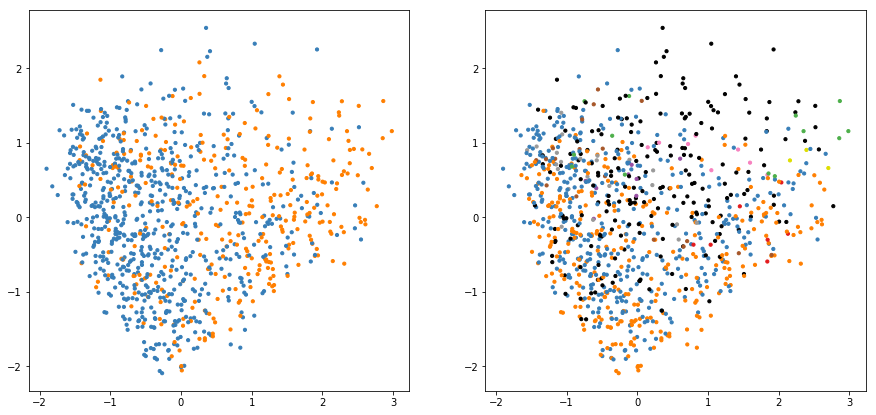

In [23]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1,2, figsize = (15,7))
ax[0].scatter(X_trans[:, 0], X_trans[:, 1], s=10, color=colors[y_true])
ax[1].scatter(X_trans[:, 0], X_trans[:, 1], s=10, color=colors[y_dbs])

### KMeanse:

Each point belongs to the nearest mean and each mean is the mean of all the points belonging to it. It is trained using an iterative process which is a variation (simpler version) of Expectation Maximization algorithm.

<br>
Source: https://en.wikipedia.org/wiki/DBSCAN

In [24]:
from sklearn.cluster import KMeans


kmeans = KMeans (n_clusters=2, n_jobs = -1).fit (X_trans)

In [25]:
y_kmns = kmeans.labels_

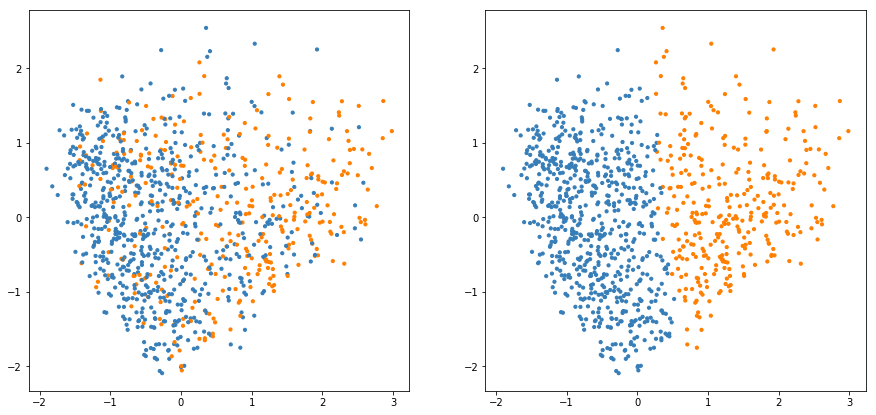

In [26]:
f, ax = plt.subplots(1,2, figsize = (15,7))
ax[0].scatter(X_trans[:, 0], X_trans[:, 1], s=10, color=colors[y_true])
ax[1].scatter(X_trans[:, 0], X_trans[:, 1], s=10, color=colors[y_kmns])